In [31]:
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.applications import VGG16, VGG19, ResNet50V2
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, CSVLogger
import visualkeras
from PIL import ImageFont
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [10]:
input_shape = (150, 150, 3)

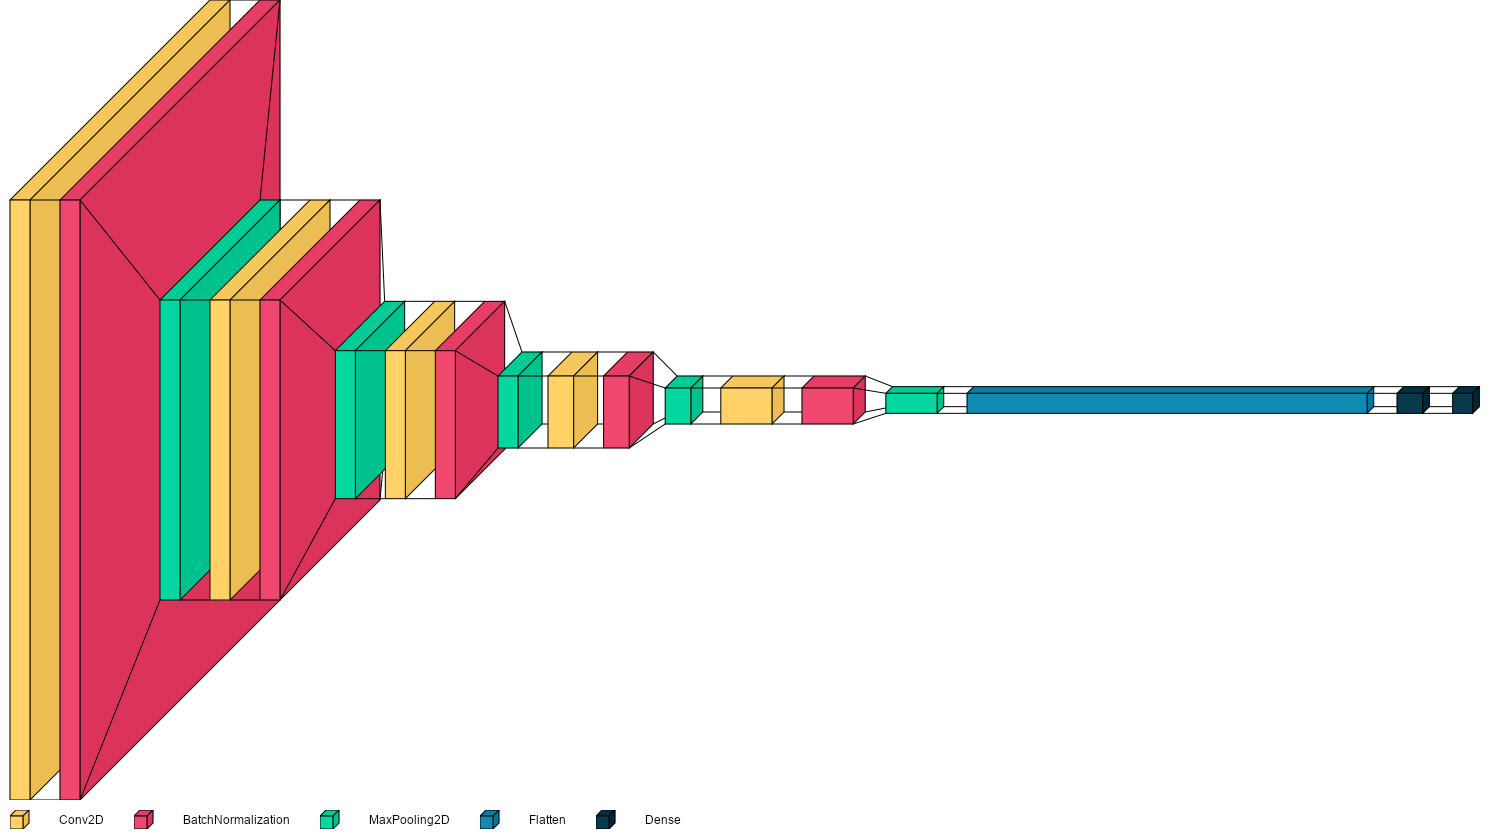

In [11]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3),
          input_shape=input_shape, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3),
                                 input_shape=input_shape, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3),
                                 input_shape=input_shape, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3),
                                 input_shape=input_shape, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3, 3),
                                 input_shape=input_shape, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(4, activation='softmax'))

font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(model, legend=True, font=font, spacing=30)


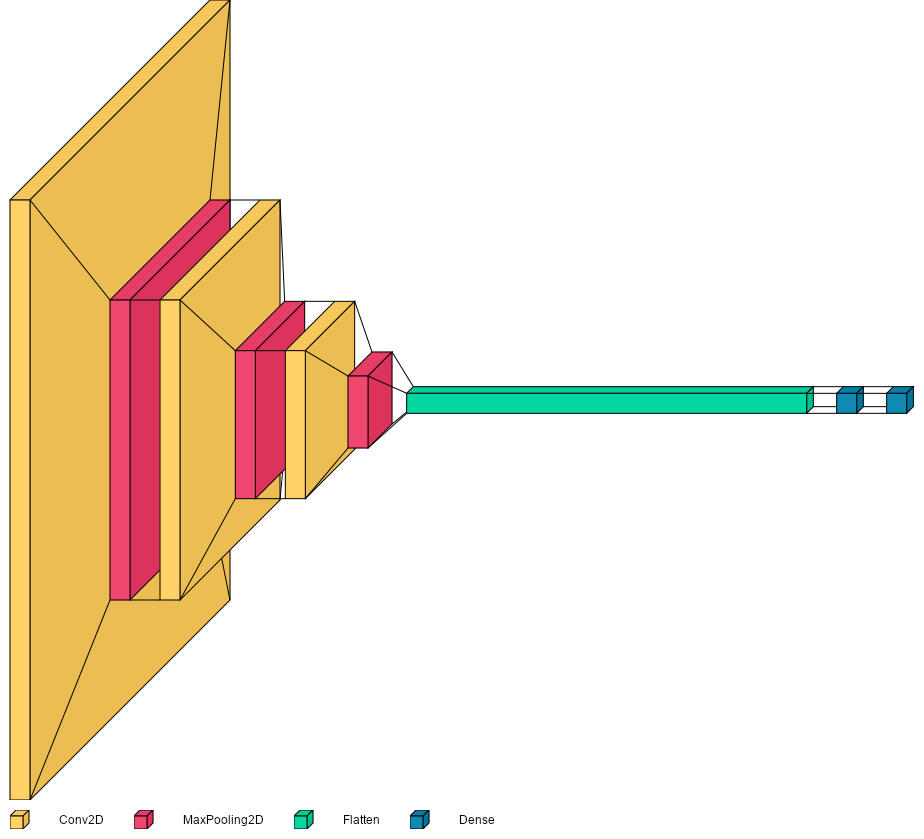

In [4]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3),
          input_shape=input_shape, activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(
    3, 3), input_shape=input_shape, activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(
    3, 3), input_shape=input_shape, activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(4, activation='softmax'))

font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(model, legend=True, font=font, spacing=30)


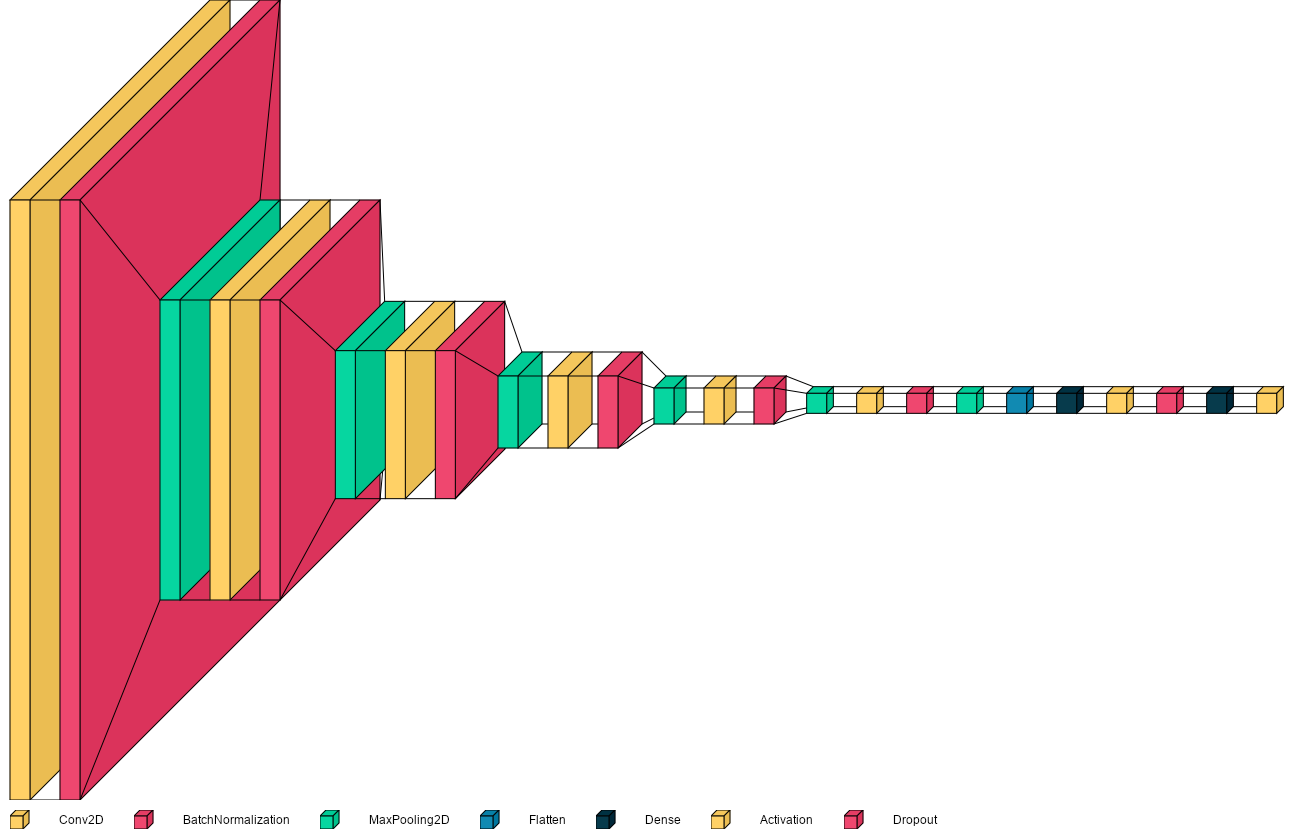

In [5]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3),
          input_shape=input_shape, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3),
          input_shape=input_shape, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(
    3, 3), input_shape=input_shape, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(
    3, 3), input_shape=input_shape, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(
    3, 3), input_shape=input_shape, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(
    3, 3), input_shape=input_shape, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Activation('relu'))
#model.add(tf.keras.layers.Dropout(0.5)) #v1
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(4))
model.add(tf.keras.layers.Activation('softmax'))

font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(model, legend=True, font=font, spacing=30)


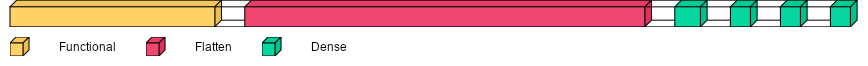

In [6]:
resnet_model = ResNet50V2(
     weights='imagenet', include_top=False, input_shape=input_shape)

for layer in resnet_model.layers:
        layer.trainable = False

model = tf.keras.Sequential([
        resnet_model,
        tf.keras.layers.Flatten(),
        #tf.keras.layers.GlobalAvgPool2D(),
        tf.keras.layers.Dense(256, activation='relu'),
        #tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(128, activation='relu'),
        #tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(64, activation='relu'),
        #tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(4, activation='softmax')
    ])

font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(model, legend=True, font=font, spacing=30)


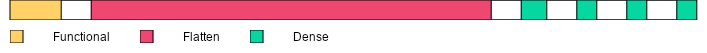

In [7]:
resnet_model = VGG16(
     weights='imagenet', include_top=False, input_shape=input_shape)

for layer in resnet_model.layers:
        layer.trainable = False

model = tf.keras.Sequential([
        resnet_model,
        tf.keras.layers.Flatten(),
        #tf.keras.layers.GlobalAvgPool2D(),
        tf.keras.layers.Dense(256, activation='relu'),
        #tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(128, activation='relu'),
        #tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(64, activation='relu'),
        #tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(4, activation='softmax')
    ])

font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(model, legend=True, font=font, draw_volume=False, spacing=30)


In [8]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_4 (Flatten)         (None, 8192)              0         
                                                                 
 dense_10 (Dense)            (None, 256)               2097408   
                                                                 
 dense_11 (Dense)            (None, 128)               32896     
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                                 
 dense_13 (Dense)            (None, 4)                 260       
                                                                 
Total params: 16,853,508
Trainable params: 2,138,820
N

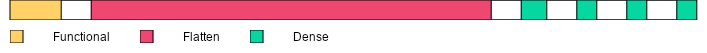

In [34]:
resnet_model = VGG19(
     weights='imagenet', include_top=False, input_shape=input_shape)

for layer in resnet_model.layers:
        layer.trainable = False

model = tf.keras.Sequential([
        resnet_model,
        tf.keras.layers.Flatten(),
        #tf.keras.layers.GlobalAvgPool2D(),
        tf.keras.layers.Dense(256, activation='relu'),
        #tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(128, activation='relu'),
        #tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(64, activation='relu'),
        #tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(4, activation='softmax')
    ])

font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(model, legend=True, font=font, draw_volume=False, spacing=30)

In [27]:
frente_umida_count=0
fundo_intermediaria_count=0
meio_seca_count=0
casca_amendoim_count=0

In [28]:
# materiais e métodos
# contando a quantidade de imagens de cada classe

def count_classes(directory_path):
    global frente_umida_count, fundo_intermediaria_count, meio_seca_count, casca_amendoim_count

    if os.path.exists(directory_path):
        for filename in os.listdir(directory_path):
            if os.path.isfile(os.path.join(directory_path, filename)):
                name = filename.split(" ")[0]
                if name == 'Frente+Umida':
                    frente_umida_count = frente_umida_count + 1
                elif name == 'Fundo+Intermediaria':
                    fundo_intermediaria_count+=1
                elif name == 'Meio+Seca':
                    meio_seca_count+=1
                elif name == 'camendoim6sCenL1':
                    casca_amendoim_count+=1

In [29]:
# 1. dataset3amostras
count_classes('dataset3amostras')

# 2. dataset4amostrasFrente+Umida
count_classes('dataset4amostrasFrente+Umida')

# 3. dataset5amostrasMeio+Seca
count_classes('dataset5amostrasMeio+Seca')

# 4. dataset6amostrasFundo+Intermediaria
count_classes('dataset6amostrasFundo+Intermediaria')

# 5. dataset7CascaAmendoim6semCentroL1
count_classes('dataset7CascaAmendoim6semCentroL1')

In [30]:
print("frente_umida_count:", frente_umida_count)
print("fundo_intermediaria_count:", fundo_intermediaria_count)
print("meio_seca_count:", meio_seca_count)
print("casca_amendoim_count:", casca_amendoim_count)

frente_umida_count: 68
fundo_intermediaria_count: 109
meio_seca_count: 121
casca_amendoim_count: 107


In [31]:
df = {'classes':['Frente úmida (maravalha)', 'Fundo intermediária (maravalha)', 'Meio seca (maravalha)', 'Casca de amendoim (casca de amendoim)'], 
      'count':[frente_umida_count, fundo_intermediaria_count, meio_seca_count, casca_amendoim_count]}

df = pd.DataFrame.from_dict(df)

df['porcentagem'] = round(df['count'] / df['count'].sum() * 100, 1)

In [32]:
df

classes  count  porcentagem
0               Frente úmida (maravalha)     68         16.8
1        Fundo intermediária (maravalha)    109         26.9
2                  Meio seca (maravalha)    121         29.9
3  Casca de amendoim (casca de amendoim)    107         26.4

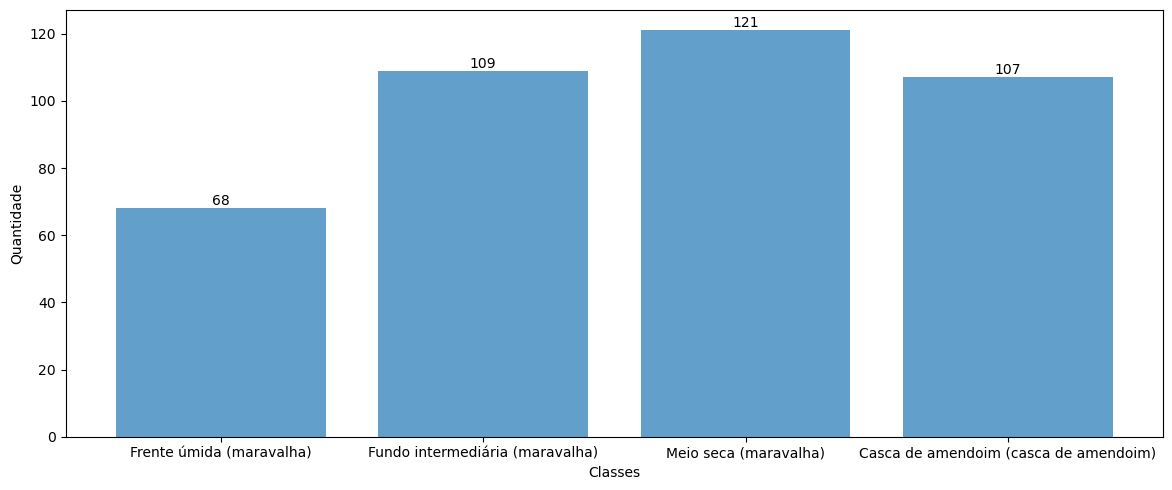

In [70]:

fig, ax = plt.subplots(figsize=(12, 5)) 
ax.bar(x='classes', height='count', data=df, alpha=0.7)
for index, row in df.iterrows():
    ax.text(index, row['count'], str(row['count']), ha='center', va='bottom')

plt.xlabel('Classes')
plt.ylabel('Quantidade')
plt.xticks(range(len(df['classes'])), df['classes'])
plt.tight_layout() 
#plt.show()
plt.savefig('amostras_gráfico.png', bbox_inches='tight')

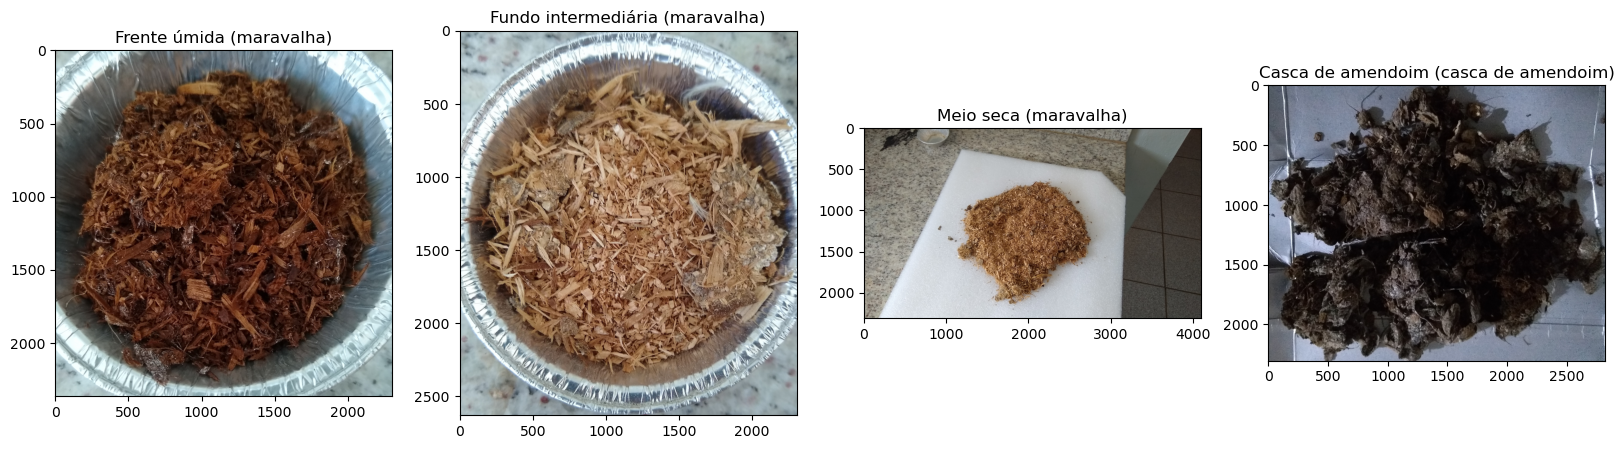

In [68]:
# amostras de frente úmida
plt.figure(figsize=(20, 16))

# frente úmida
plt.subplot(1, 4, 1)
plt.imshow(plt.imread('dataset3amostras/Frente+Umida (1).jpg'), 'gray', vmin=0, vmax=255)
plt.title('Frente úmida (maravalha)')
    
# fundo intermediária
plt.subplot(1, 4, 2)
plt.imshow(plt.imread('dataset3amostras/Fundo+Intermediaria (3).jpg'), 'gray', vmin=0, vmax=255)
plt.title('Fundo intermediária (maravalha)')

# meio seca
plt.subplot(1, 4, 3)
plt.imshow(plt.imread('dataset5amostrasMeio+Seca/Meio+Seca (91).jpg'), 'gray', vmin=0, vmax=255)
plt.title('Meio seca (maravalha)')

# casca amendoim
plt.subplot(1, 4, 4)
plt.imshow(plt.imread('dataset7CascaAmendoim6semCentroL1/camendoim6sCenL1 (1).jpg'), 'gray', vmin=0, vmax=255)
plt.title('Casca de amendoim (casca de amendoim)')

plt.savefig('amostras.png', bbox_inches='tight')

In [78]:
def grid(path):

    img = plt.imread(path)

    y_factor = img.shape[0]//3
    x_factor = img.shape[1]//3

    plt.figure(figsize=(12, 8))
    plt.subplot(3, 3, 1)
    # top right
    plt.imshow(img[0:y_factor, 0:x_factor], 'gray', vmin=0, vmax=255)
    plt.title('Top left')
        
    plt.subplot(3, 3, 2)
    # top middle
    plt.imshow(img[0:y_factor, x_factor:x_factor*2], 'gray', vmin=0, vmax=255)
    plt.title('Top middle')
    
    plt.subplot(3, 3, 3)
    # top left
    plt.imshow(img[0:y_factor, x_factor*2:x_factor*3], 'gray', vmin=0, vmax=255)
    plt.title('Top right')

    plt.subplot(3, 3, 4)
    # middle right
    plt.imshow(img[y_factor:y_factor*2,  0:x_factor], 'gray', vmin=0, vmax=255)
    plt.title('Middle left')

    plt.subplot(3, 3, 5)
    # middle middle
    plt.imshow(img[y_factor:y_factor*2, x_factor:x_factor*2], 'gray', vmin=0, vmax=255)
    plt.title('Middle middle')

    plt.subplot(3, 3, 6)
    # middle left
    plt.imshow(img[y_factor:y_factor*2, x_factor*2:x_factor*3], 'gray', vmin=0, vmax=255)
    plt.title('Middle right')

    plt.subplot(3, 3, 7)
    # bottom left
    plt.imshow(img[y_factor*2:y_factor*3,  0:x_factor], 'gray', vmin=0, vmax=255)
    plt.title('Bottom left')

    plt.subplot(3, 3, 8)
    # bottom middle
    plt.imshow(img[y_factor*2:y_factor*3, x_factor:x_factor*2], 'gray', vmin=0, vmax=255)
    plt.title('Bottom middle')

    plt.subplot(3, 3, 9)
    # bottom right
    plt.imshow(img[y_factor*2:y_factor*3, x_factor*2:x_factor*3], 'gray', vmin=0, vmax=255)
    plt.title('Bottom right')
    
    plt.savefig(path.split("/")[-1].split('.')[0]+".jpg", bbox_inches='tight')

In [26]:
# grid('dataset3amostras/Frente+Umida (1).jpg')

In [27]:
# grid('dataset3amostras/Fundo+Intermediaria (3).jpg')

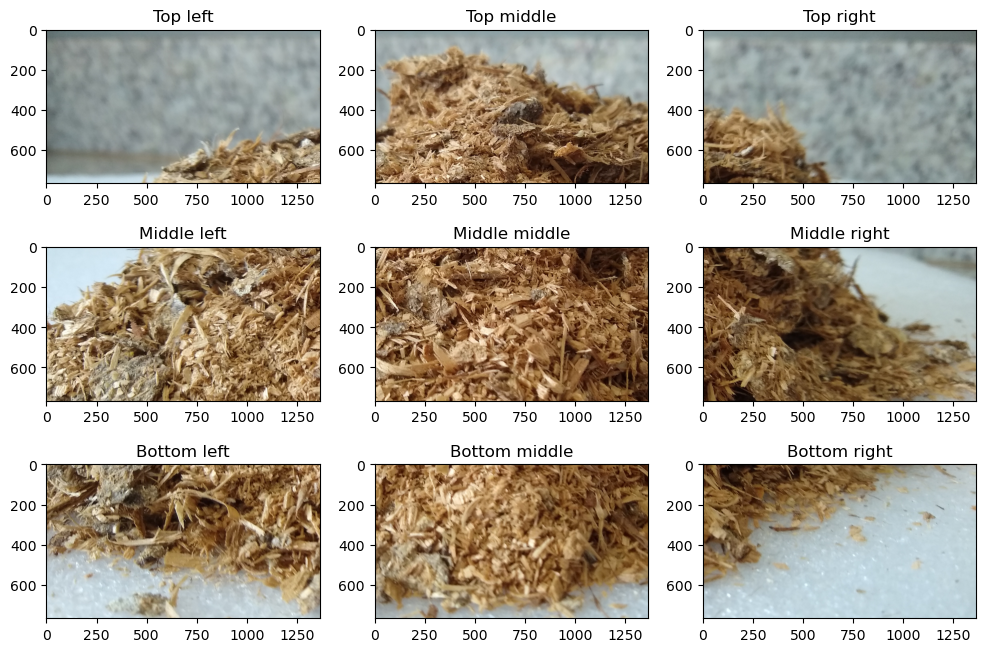

In [79]:
grid('dataset5amostrasMeio+Seca/Meio+Seca (19).jpg')

In [28]:
# grid('dataset7CascaAmendoim6semCentroL1/camendoim6sCenL1 (1).jpg')

Text(0.5, 1.0, 'Frente úmida (maravalha)')

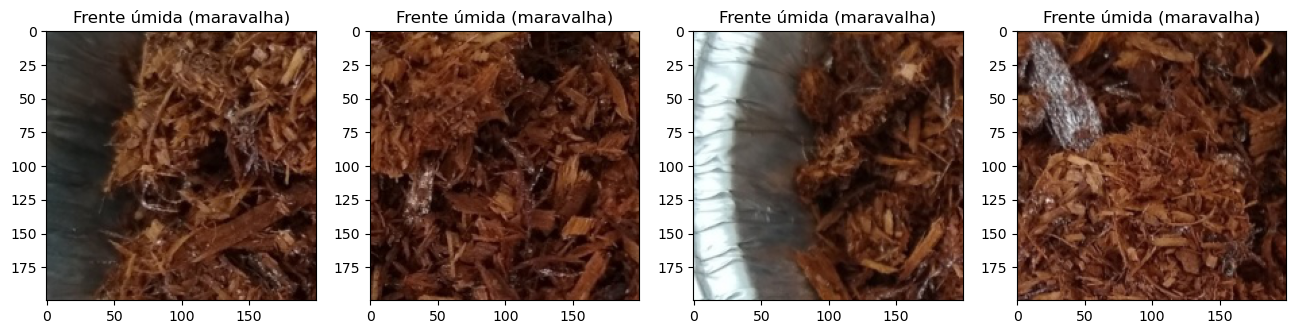

In [59]:
# amostras de frente úmida após resize
plt.figure(figsize=(16, 16))

plt.subplot(1, 4, 1)
plt.imshow(plt.imread('camas_tiles_train/Frente+Umida/Frente+Umida (1)_middle_left.jpg'), 'gray', vmin=0, vmax=255)
plt.title('Frente úmida (maravalha)')
    
plt.subplot(1, 4, 2)
plt.imshow(plt.imread('camas_tiles_train/Frente+Umida/Frente+Umida (1)_middle_middle.jpg'), 'gray', vmin=0, vmax=255)
plt.title('Frente úmida (maravalha)')

plt.subplot(1, 4, 3)
plt.imshow(plt.imread('camas_tiles_train/Frente+Umida/Frente+Umida (2)_middle_left.jpg'), 'gray', vmin=0, vmax=255)
plt.title('Frente úmida (maravalha)')

plt.subplot(1, 4, 4)
plt.imshow(plt.imread('camas_tiles_train/Frente+Umida/Frente+Umida (2)_middle_middle.jpg'), 'gray', vmin=0, vmax=255)
plt.title('Frente úmida (maravalha)')


Text(0.5, 1.0, 'Fundo intermediária (maravalha)')

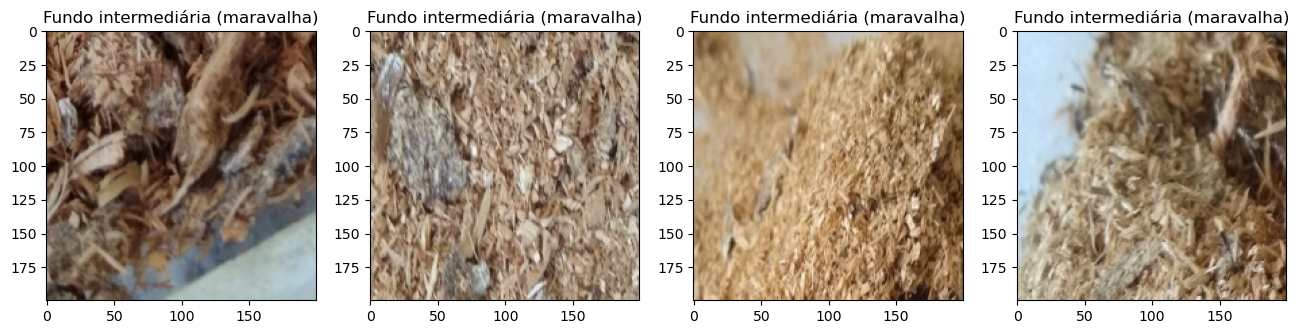

In [60]:
# amostras de fundo intermediaria após resize
plt.figure(figsize=(16, 16))

plt.subplot(1, 4, 1)
plt.imshow(plt.imread('camas_tiles_train/Fundo+Intermediaria/Fundo+Intermediaria (2)_bottom_middle.jpg'), 'gray', vmin=0, vmax=255)
plt.title('Fundo intermediária (maravalha)')

plt.subplot(1, 4, 2)
plt.imshow(plt.imread('camas_tiles_train/Fundo+Intermediaria/Fundo+Intermediaria (86)_middle_middle.jpg'), 'gray', vmin=0, vmax=255)
plt.title('Fundo intermediária (maravalha)')

plt.subplot(1, 4, 3)
plt.imshow(plt.imread('camas_tiles_train/Fundo+Intermediaria/Fundo+Intermediaria (85)_top_middle.jpg'), 'gray', vmin=0, vmax=255)
plt.title('Fundo intermediária (maravalha)')

plt.subplot(1, 4, 4)
plt.imshow(plt.imread('camas_tiles_train/Fundo+Intermediaria/Fundo+Intermediaria (89)_middle_left.jpg'), 'gray', vmin=0, vmax=255)
plt.title('Fundo intermediária (maravalha)')

Text(0.5, 1.0, 'Meio seca (maravalha)')

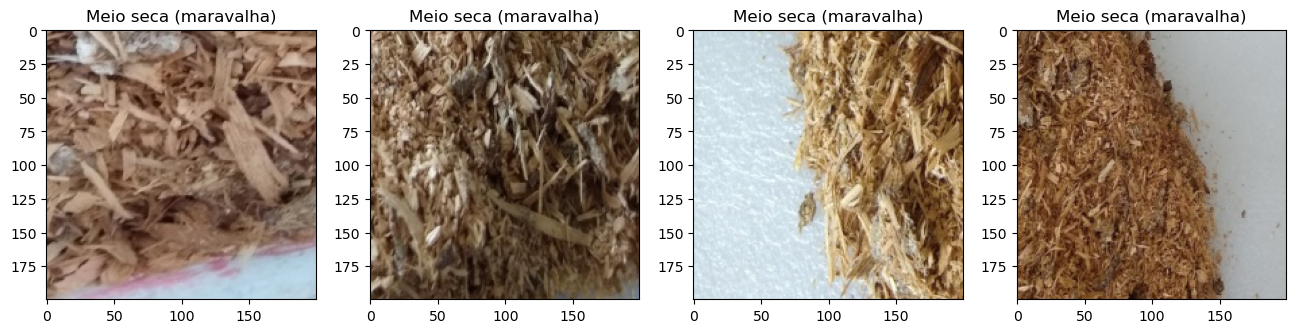

In [61]:
# amostras de meio seca após resize
plt.figure(figsize=(16, 16))

plt.subplot(1, 4, 1)
plt.imshow(plt.imread('camas_tiles_train/Meio+Seca/Meio+Seca (1)_bottom_middle.jpg'), 'gray', vmin=0, vmax=255)
plt.title('Meio seca (maravalha)')
    
plt.subplot(1, 4, 2)
plt.imshow(plt.imread('camas_tiles_train/Meio+Seca/Meio+Seca (102)_bottom_right.jpg'), 'gray', vmin=0, vmax=255)
plt.title('Meio seca (maravalha)')

plt.subplot(1, 4, 3)
plt.imshow(plt.imread('camas_tiles_train/Meio+Seca/Meio+Seca (106)_bottom_left.jpg'), 'gray', vmin=0, vmax=255)
plt.title('Meio seca (maravalha)')

plt.subplot(1, 4, 4)
plt.imshow(plt.imread('camas_tiles_train/Meio+Seca/Meio+Seca (66)_middle_middle.jpg'), 'gray', vmin=0, vmax=255)
plt.title('Meio seca (maravalha)')

Text(0.5, 1.0, 'Casca de amendoim')

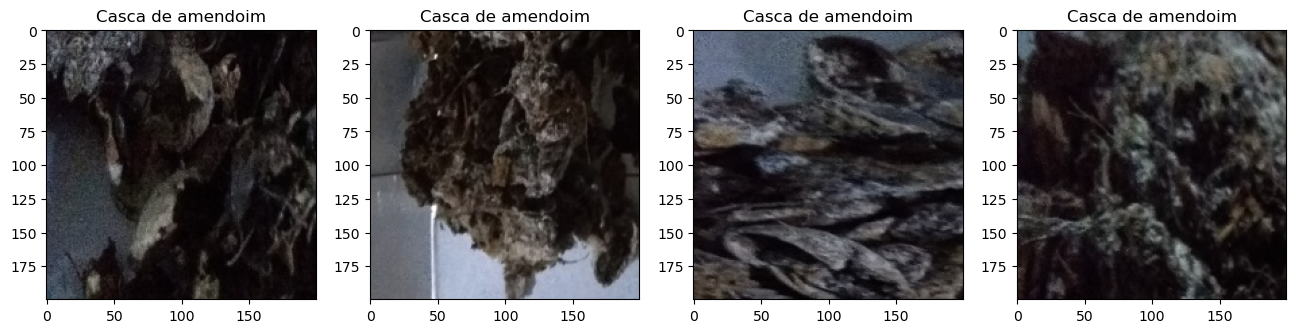

In [62]:
# amostras de casca de amendoim após resize
plt.figure(figsize=(16, 16))

plt.subplot(1, 4, 1)
plt.imshow(plt.imread('camas_tiles_train/camendoim6sCenL1/camendoim6sCenL1 (4)_bottom_left.jpg'), 'gray', vmin=0, vmax=255)
plt.title('Casca de amendoim')
    
plt.subplot(1, 4, 2)
plt.imshow(plt.imread('camas_tiles_train/camendoim6sCenL1/camendoim6sCenL1 (1)_bottom_left.jpg'), 'gray', vmin=0, vmax=255)
plt.title('Casca de amendoim')

plt.subplot(1, 4, 3)
plt.imshow(plt.imread('camas_tiles_train/camendoim6sCenL1/camendoim6sCenL1 (35)_top_left.jpg'), 'gray', vmin=0, vmax=255)
plt.title('Casca de amendoim')

plt.subplot(1, 4, 4)
plt.imshow(plt.imread('camas_tiles_train/camendoim6sCenL1/camendoim6sCenL1 (107)_top_left.jpg'), 'gray', vmin=0, vmax=255)
plt.title('Casca de amendoim')

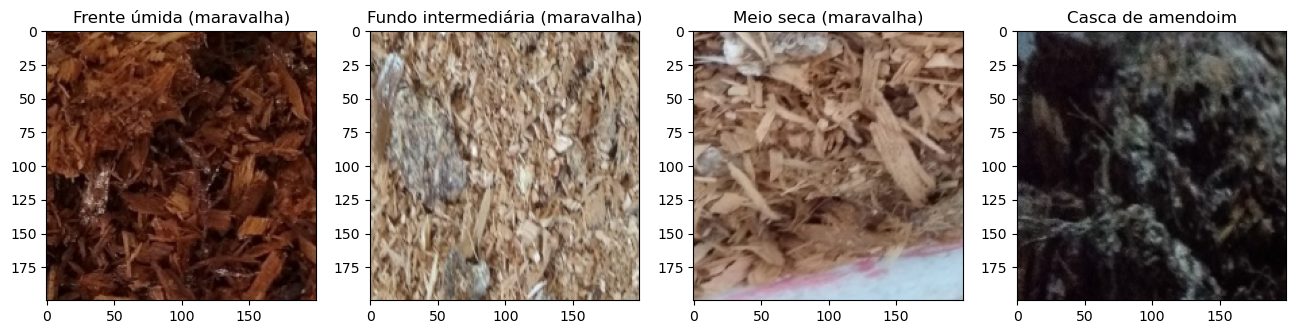

In [84]:
# uma de cada
plt.figure(figsize=(16, 16))

plt.subplot(1, 4, 1)
plt.imshow(plt.imread('camas_tiles_train/Frente+Umida/Frente+Umida (1)_middle_middle.jpg'), 'gray', vmin=0, vmax=255)
plt.title('Frente úmida (maravalha)')
    
plt.subplot(1, 4, 2)
plt.imshow(plt.imread('camas_tiles_train/Fundo+Intermediaria/Fundo+Intermediaria (86)_middle_middle.jpg'), 'gray', vmin=0, vmax=255)
plt.title('Fundo intermediária (maravalha)')

plt.subplot(1, 4, 3)
plt.imshow(plt.imread('camas_tiles_train/Meio+Seca/Meio+Seca (1)_bottom_middle.jpg'), 'gray', vmin=0, vmax=255)
plt.title('Meio seca (maravalha)')

plt.subplot(1, 4, 4)
plt.imshow(plt.imread('camas_tiles_train/camendoim6sCenL1/camendoim6sCenL1 (107)_top_left.jpg'), 'gray', vmin=0, vmax=255)
plt.title('Casca de amendoim')

plt.savefig("amostras_camas.jpg", bbox_inches='tight')

In [63]:
# contando o total de imagens de cada classe

frente_umida=0
fundo_intermediaria=0
meio_seca=0
casca_amendoim=0

if os.path.exists("camas_tiles"):
        for filename in os.listdir("camas_tiles"):
            if os.path.isfile(os.path.join("camas_tiles", filename)):
                name = filename.split(" ")[0]
                if name == 'Frente+Umida':
                    frente_umida+=1
                elif name == 'Fundo+Intermediaria':
                    fundo_intermediaria+=1
                elif name == 'Meio+Seca':
                    meio_seca+=1
                elif name == 'camendoim6sCenL1':
                    casca_amendoim+=1

In [64]:
df1 = {'classes':['Frente úmida (maravalha)', 'Fundo intermediária (maravalha)', 'Meio seca (maravalha)', 'Casca de amendoim (casca de amendoim)'], 
      'count':[frente_umida, fundo_intermediaria, meio_seca, casca_amendoim]}

df1 = pd.DataFrame.from_dict(df1)

df1['porcentagem'] = round(df1['count'] / df1['count'].sum() * 100, 1)

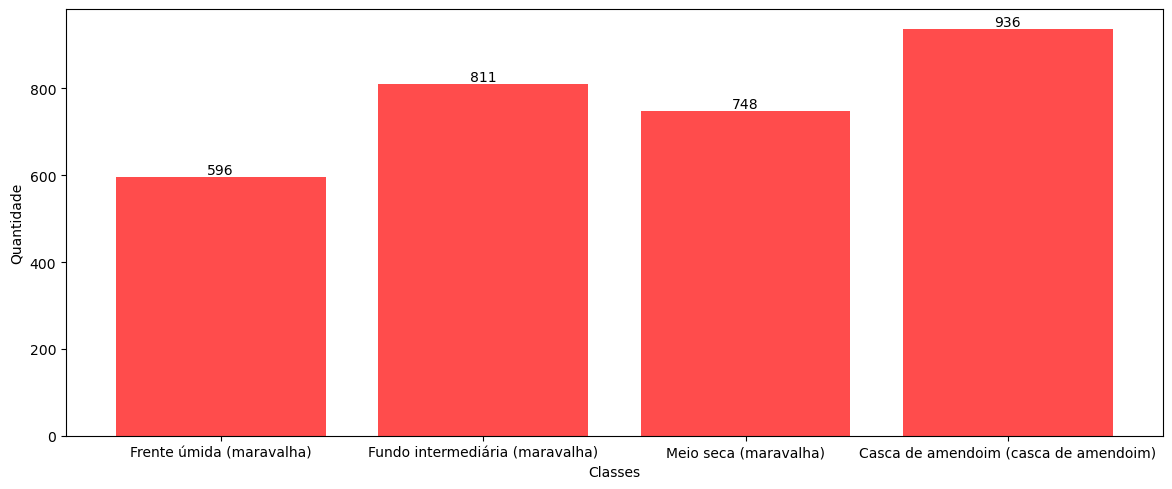

In [82]:
fig, ax = plt.subplots(figsize=(12, 5)) 
ax.bar(x='classes', height='count', data=df1, color='red', alpha=0.7)
for index, row in df1.iterrows():
    ax.text(index, row['count'], str(row['count']), ha='center', va='bottom')

plt.xlabel('Classes')
plt.ylabel('Quantidade')
plt.xticks(range(len(df1['classes'])), df1['classes'])
plt.tight_layout() 
plt.savefig("dataset_grafico.jpg", bbox_inches='tight')

In [66]:
df1

classes  count  porcentagem
0               Frente úmida (maravalha)    596         19.3
1        Fundo intermediária (maravalha)    811         26.2
2                  Meio seca (maravalha)    748         24.2
3  Casca de amendoim (casca de amendoim)    936         30.3

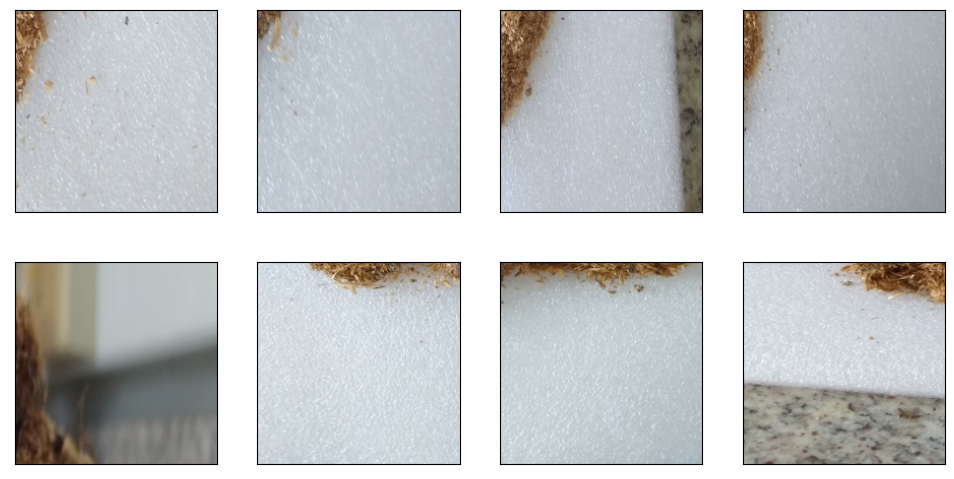

In [30]:
# amostras de imagens excluídas

# amostras de casca de amendoim após resize
plt.figure(figsize=(12, 6))

plt.subplot(2, 4, 1)
plt.imshow(plt.imread('imagens_removidas/Fundo+Intermediaria (59)_bottom_right.jpg'), 'gray', vmin=0, vmax=255)
plt.xticks([])
plt.yticks([])
    
plt.subplot(2, 4, 2)
plt.imshow(plt.imread('imagens_removidas/Fundo+Intermediaria (60)_bottom_right.jpg'), 'gray', vmin=0, vmax=255)
plt.xticks([])
plt.yticks([])

plt.subplot(2, 4, 3)
plt.imshow(plt.imread('imagens_removidas/Fundo+Intermediaria (65)_bottom_right.jpg'), 'gray', vmin=0, vmax=255)
plt.xticks([])
plt.yticks([])

plt.subplot(2, 4, 4)
plt.imshow(plt.imread('imagens_removidas/Fundo+Intermediaria (77)_bottom_right.jpg'), 'gray', vmin=0, vmax=255)
plt.xticks([])
plt.yticks([])

plt.subplot(2, 4, 5)
plt.imshow(plt.imread('imagens_removidas/Meio+Seca (16)_top_right.jpg'), 'gray', vmin=0, vmax=255)
plt.xticks([])
plt.yticks([])
    
plt.subplot(2, 4, 6)
plt.imshow(plt.imread('imagens_removidas/Meio+Seca (73)_bottom_left.jpg'), 'gray', vmin=0, vmax=255)
plt.xticks([])
plt.yticks([])

plt.subplot(2, 4, 7)
plt.imshow(plt.imread('imagens_removidas/Meio+Seca (76)_bottom_right.jpg'), 'gray', vmin=0, vmax=255)
plt.xticks([])
plt.yticks([])

plt.subplot(2, 4, 8)
plt.imshow(plt.imread('imagens_removidas/Meio+Seca (79)_bottom_left.jpg'), 'gray', vmin=0, vmax=255)
plt.xticks([])
plt.yticks([])

plt.savefig("removidas_amostras.jpg", bbox_inches='tight')

In [1]:
# mostrando canais da imagem rgb
img = cv2.imread('camas_tiles_train/Frente+Umida/Frente+Umida (1)_middle_middle.jpg')
b, g, r = cv2.split(img)

([], [])

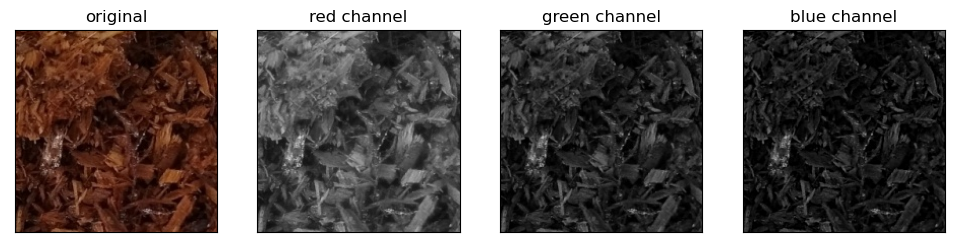

In [25]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_RGB2BGR), 'gray', vmin=0, vmax=255)
plt.title('original')
plt.xticks([])
plt.yticks([])

plt.subplot(1, 4, 2)
plt.imshow(r, 'gray', vmin=0, vmax=255)
plt.title('red channel')
plt.xticks([])
plt.yticks([])

plt.subplot(1, 4, 3)
plt.imshow(g, 'gray', vmin=0, vmax=255)
plt.title('green channel')
plt.xticks([])
plt.yticks([])

plt.subplot(1, 4, 4)
plt.imshow(b, 'gray', vmin=0, vmax=255)
plt.title('blue channel')
plt.xticks([])
plt.yticks([])